Import the necessary libraries to perform the processing and plotting.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

Load and isolate the Married column needed for the bivariant analysis.

In [19]:
raw_data = pd.read_csv("./data/raw_data.csv")

maritual_data = raw_data['Married']

Find the mode of the data and prepare it to replace missing data with the mode.

In [20]:
mode = maritual_data.mode().values[0]
if mode == "Yes":
    mode = 1
elif mode == "No":
    mode = 0

Encode the Married column to save space and improve processing speeds.

In [21]:
le = LabelEncoder()
encoded_maritual = le.fit_transform(maritual_data)

Replace every instance of missing data (transformed to 2) with the mode of the data (in this case Yes or 0 after encoded).

In [22]:
encoded_maritual = np.where(encoded_maritual == 2, mode, encoded_maritual)

Now we can continue to count the number of each instance of Yes(401) or No(213) = 614.

In [23]:
a = np.array(encoded_maritual)
b = np.unique(a, return_counts=True)
yes_totals = b[1][1]
no_totals = b[1][0]
maritual_totals = yes_totals, no_totals

This line of code creates a crosstabulation to summarize the loan counts by Married and loan status.

In [24]:
married_loan_counts = pd.crosstab(raw_data['Married'], raw_data['Loan_Status'])

Plot the data using a bar graph.

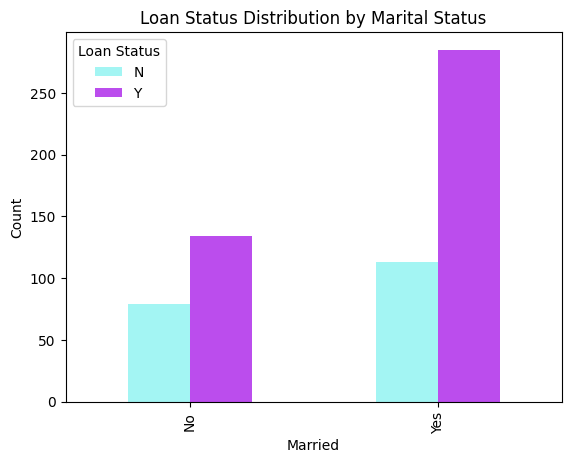

In [25]:
married_loan_counts.plot(kind='bar', stacked=False, color= ['#A3F5F3', '#BB4DED'])
plt.xlabel('Married')
plt.ylabel('Count')
plt.title('Loan Status Distribution by Marital Status')

plt.legend(title='Loan Status')
plt.show()

As we can see from the bar graph, you are more likely to be given a loan if you are married. I would like to mention however, that the data may be biased towards married people since they are the prodominant category from the Married column.